In [1]:
#This code works only for real-valued refraction index.
#I used this code for an Optics exams which later evolve into the Complex valued code!

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filter_angle(theta_input, nit, is_dg=False):
    """
    Filter the angles in such a way only real solutions for the Fresnel coefficients are used.
    nti is an array [n_i, n_t].
    """
    if is_dg:
        theta_input = theta_input * np.pi / 180
    
    n_i, n_t = nit
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi / 2
        
    mask = (theta_input >= 0) & (theta_input <= theta_max)
    theta = theta_input[mask]
    
    return theta

def fresnel_coe(theta_input, nit, is_dg=False):
    """ Compute the fresnel_coe and its respective arrays of incident and refracted angles."""
    theta_i = filter_angle(theta_input, nit, is_dg)
    n_i, n_t = nit
    theta_t = np.arcsin(n_i * np.sin(theta_i) / n_t)
    
    r_s = (n_i * np.cos(theta_i) - n_t * np.cos(theta_t)) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
    r_p = (n_t * np.cos(theta_i) - n_i * np.cos(theta_t)) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))
    t_s = 2 * n_i * np.cos(theta_i) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
    t_p = 2 * n_i * np.cos(theta_i) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))
    
    return np.array([r_s, r_p, t_s, t_p]), theta_i, theta_t

def ene_coef(theta_input, nit, is_dg=False):
    """Computes an array E which contains the coeficients for a given theta_i,theta_t """
    coef, theta_i, theta_t = fresnel_coe(theta_input, nit, is_dg)
    n_i, n_t = nit
    
   
    E = np.array([1, 1, 1, 1])  # Placeholder for E, replace with actual values or pass as a parameter
    E = coef**2
    E[2] = E[2] * n_t * np.cos(theta_t) / (n_i * np.cos(theta_i))
    E[3] = E[3] * n_t * np.cos(theta_t) / (n_i * np.cos(theta_i))
    
    return E,theta_i,theta_t
    



In [3]:
def plot_coef(theta_input, nti, is_dg=False, plot_which=[True, True, True, True], plot_degree=False):
    coef, theta_i, theta_t = fresnel_coe(theta_input, nti, is_dg)

    n_i, n_t = nti
    names = ['$r_s$', '$r_p$', '$t_s$', '$t_p$']

    plt.figure()
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi/2

    if plot_degree:
        theta_i=theta_i*180/np.pi
        theta_max=theta_max*180/np.pi

    plt.axvline(x=theta_max, color='#D3D3D3', linestyle='--', label='$\\theta_c$')
    for i in range(len(plot_which)):
        if plot_which[i]:
            plt.plot(theta_i, coef[i], label=names[i])
    plt.grid(True)
    plt.xlabel('$\\theta_i$')
    plt.ylabel('coef')
    plt.legend()
    plt.show()

def plot_tran(theta_input, nti, is_dg=False, plot_which=[True, True, True, True],plot_degree=False):
    E, theta_i, theta_t = ene_coef(theta_input, nti, is_dg)

    n_i, n_t = nti
    names = ['$R_s$', '$R_p$', '$T_s$', '$T_p$']

    plt.figure()
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi/2
    plt.axvline(x=theta_max, color='#D3D3D3', linestyle='--', label='$\\theta_c$')

    if plot_degree:
        theta_i=theta_i*180/np.pi
        theta_max=theta_max*180/np.pi
    
    for i in range(len(plot_which)):
        if plot_which[i]:
            plt.plot(theta_i, E[i], label=names[i])
    plt.grid(True)
    plt.xlabel('$\\theta_i$')
    plt.ylabel('Fraction')
    plt.legend()
    plt.show()

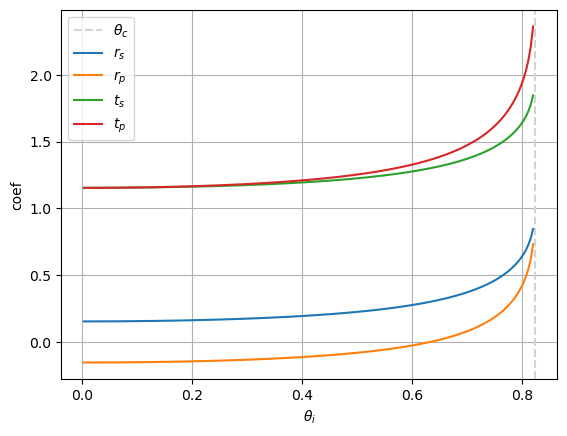

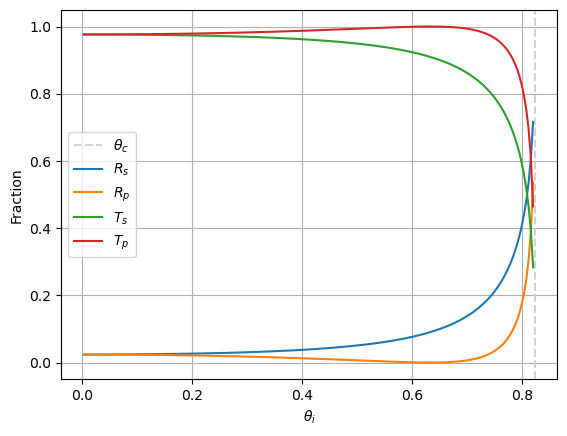

In [4]:
theta=np.linspace(-1,np.pi,1000)  #shouldn't matter the starting points
n_i=1.5
n_t=1.1
plots=[True,True,True,True]

plot_coef(theta,(n_i,n_t),False,plots)
plot_tran(theta,(n_i,n_t),False,plots)

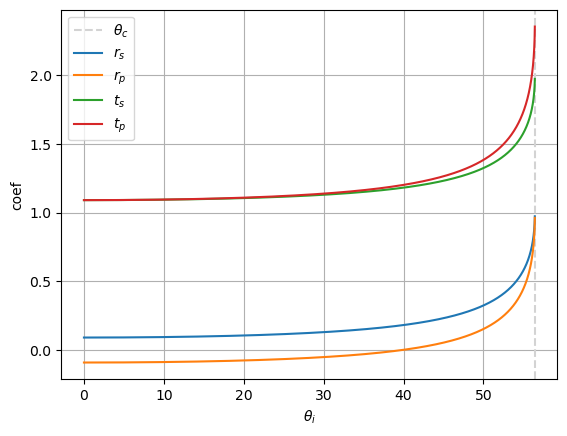

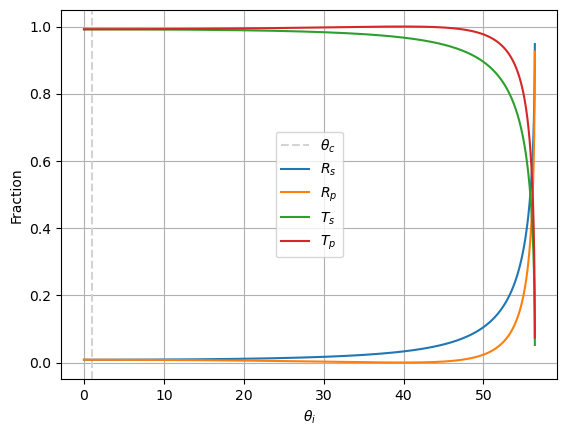

In [5]:
theta=np.linspace(0,90,1000000)  #shouldn't matter the starting points
n_i=1.2
n_t=1
plots=[True,True,True,True]
#fresnel_coe(theta,(n_i,n_t))
plot_coef(theta,(n_i,n_t),False,plots,True)
plot_tran(theta,(n_i,n_t),False,plots,True)

In [6]:


def filter_angle_complex(theta_input, nit, is_dg=False):
    """
    Filter the angles in such a way only real solutions for the Fresnel coefficients are used.
    nti is an array [n_i, n_t]. Return a complex value angle if needed!
    """
    if is_dg:
        theta_input = theta_input * np.pi / 180
    
    n_i, n_t = nit
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi / 2
        
    mask_1 = (theta_input >= 0) & (theta_input <= theta_max)
    mask_2 = (theta_input > theta_max) & (theta_input <= np.pi / 2)
    theta = theta_input[mask_1]
    theta_complex = theta_input[mask_2]
    
    return theta, theta_complex

def fresnel_coe_complex(theta_input, nit, is_dg=False):
    """ Compute the fresnel_coe and its respective arrays of incident and refracted angles."""
    theta_i, theta_i_complex = filter_angle_complex(theta_input, nit, is_dg)

    n_i, n_t = nit
    theta_t = np.arcsin(n_i * np.sin(theta_i) / n_t)
    
    r_s = (n_i * np.cos(theta_i) - n_t * np.cos(theta_t)) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
    r_p = (n_t * np.cos(theta_i) - n_i * np.cos(theta_t)) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))
    t_s = 2 * n_i * np.cos(theta_i) / (n_i * np.cos(theta_i) + n_t * np.cos(theta_t))
    t_p = 2 * n_i * np.cos(theta_i) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))

    if len(theta_i_complex) != 0:
        # Additions:
        cos_theta_t_complex = np.sqrt((n_i * np.sin(theta_i_complex) / n_t)**2 - 1)  # Times imaginary unit  #I AM WORKING REAL
        
        module_r = np.full(len(theta_i_complex), 1)
        module_t_s = 2 * n_i * np.cos(theta_i_complex) / np.sqrt((n_i * np.cos(theta_i_complex))**2 + (n_t * cos_theta_t_complex)**2)
        module_t_p = 2 * n_i * np.cos(theta_i_complex) / np.sqrt((n_t * np.cos(theta_i_complex))**2 + (n_i * cos_theta_t_complex)**2)
        r_s = np.append(r_s, module_r)
        r_p = np.append(r_p, module_r)
        t_s = np.append(t_s, module_t_s)
        t_p = np.append(t_p, module_t_p)
        
        shift_s = np.arctan(n_t * cos_theta_t_complex / (n_i * np.cos(theta_i_complex)))  # might work for both t,r  -2 for r, and 1 for t.
        shift_p = np.arctan(n_i * cos_theta_t_complex / (n_t * np.cos(theta_i_complex)))

    else:
        shift_s = np.array([])
        shift_p = np.array([])


    shift=np.array([-2*shift_s,-2*shift_p,-shift_s,-shift_p])
    
    return np.array([r_s, r_p, t_s, t_p]), theta_i, theta_i_complex, shift  # here theta_t is the only one with the real array size. 

def ene_coef_complex(theta_input, nit, is_dg=False):
    """Computes an array E which contains the coefficients for a given theta_i, theta_t """
    coef, theta_i, theta_i_complex, shift = fresnel_coe_complex(theta_input, nit, is_dg)
    n_i, n_t = nit
    theta_t = np.arcsin(n_i * np.sin(theta_i) / n_t)
    cos_theta_t_complex = np.sqrt((n_i * np.sin(theta_i_complex) / n_t)**2 - 1) #Wihtout imaginary unit

    mask = np.concatenate((np.ones(len(theta_i), dtype=bool), np.zeros(len(theta_i_complex), dtype=bool)))  # this mask helps to separate T real and T complex

    R_s = np.abs(coef[0])**2
    R_p = np.abs(coef[1])**2
    T_s_real = np.abs(coef[2][mask])**2 * n_t * np.cos(theta_t) / (n_i * np.cos(theta_i))
    T_p_real = np.abs(coef[3][mask])**2 * n_t * np.cos(theta_t) / (n_i * np.cos(theta_i))
    T_s_complex = np.abs(coef[2][~mask])**2 * n_t * cos_theta_t_complex / (n_i * np.cos(theta_i_complex))
    T_p_complex = np.abs(coef[3][~mask])**2 * n_t * cos_theta_t_complex / (n_i * np.cos(theta_i_complex))
    
    return np.array([R_s, R_p]), np.array([T_s_real, T_p_real]), np.array([ T_s_complex,T_p_complex]), theta_i, theta_i_complex, shift
    

In [7]:
def plot_coef_complex(theta_input, nti, plot_which=[True, True, True, True], angle_rad=[False,False]):
    is_dg,plot_degree=angle_rad
    coef, theta_i, theta_i_complex, shift = fresnel_coe_complex(theta_input, nti, is_dg)

    theta_i_full=np.append(theta_i,theta_i_complex)
    n_i, n_t = nti
    names = ['$r_s$', '$r_p$', '$t_s$', '$t_p$']

    plt.figure()
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi/2

    if plot_degree:
        theta_i_full=theta_i_full*180/np.pi
        theta_max=theta_max*180/np.pi
        theta_i_complex=theta_i_complex*180/np.pi

    
    plt.axvline(x=theta_max, color='#D3D3D3', linestyle='--', label='$\\theta_c$')
    for i in range(len(plot_which)):
        if plot_which[i]:
            plt.plot(theta_i_full, coef[i], label=names[i])
    plt.grid(True)
    plt.xlabel('$\\theta_i$')
    plt.ylabel('$|Coef|$')
    plt.legend()
    plt.title("Module of Fresnel-coeficients")
    plt.show()

    #This is the additional shift phase plot:
    if len(theta_i_complex)>0:
        plt.figure()
        for i in range(len(plot_which)):
            if plot_which[i]:
                plt.plot(theta_i_complex, shift[i], label=names[i])
        plt.grid(True)
        plt.xlabel('$\\theta_i$')
        plt.ylabel('$\\delta \\phi$')
        plt.title("Change of phase beyond critical angle")
        plt.legend()
        plt.show()

def plot_tran_complex(theta_input, nti, plot_which=[True, True, True, True], angle_rad=[False,False]):
    is_dg,plot_degree=angle_rad
    R,T_real,T_complex, theta_i, theta_i_complex, shift = ene_coef_complex(theta_input, nti, is_dg)

    theta_i_full=np.append(theta_i,theta_i_complex)
    n_i, n_t = nti
    names = ['$R_s$', '$R_p$', '$T_s$', '$T_p$']
    namess=['T_s','T_p']

    plt.figure()
    
    if n_i >= n_t:
        theta_max = np.arcsin(n_t / n_i)
    else:
        theta_max = np.pi/2

    if plot_degree:
        theta_i_full=theta_i_full*180/np.pi
        theta_max=theta_max*180/np.pi
        theta_i_complex=theta_i_complex*180/np.pi
        theta_i=theta_i*180/np.pi

    
    plt.axvline(x=theta_max, color='#D3D3D3', linestyle='--', label='$\\theta_c$')
    for i in range(len(plot_which)):
        if plot_which[i]:
            if i in [0,1]:      
                plt.plot(theta_i_full, R[i], label=names[i])
            if i in [2,3]:
                plt.plot(theta_i, T_real[i-2], label=names[i])
    plt.grid(True)
    plt.xlabel('$\\theta_i$')
    plt.ylabel('$|TR|$')
    plt.title("Transmitacia y Reflectancia")
    plt.legend()
    plt.show()

    #This is the additional shift phase plot:
    if (len(theta_i_complex)>0) & ((plot_which[2] or plot_which[3])):
        plt.figure()
        for i in range(len(plot_which)-2):
            if plot_which[i+2]:
                plt.plot(theta_i_complex, T_complex[i], label=namess[i])
        plt.grid(True)
        plt.xlabel('$\\theta_i$')
        plt.ylabel('$-iT$')
        plt.title("Complex Transmitance")
        plt.legend()
        plt.show()
    

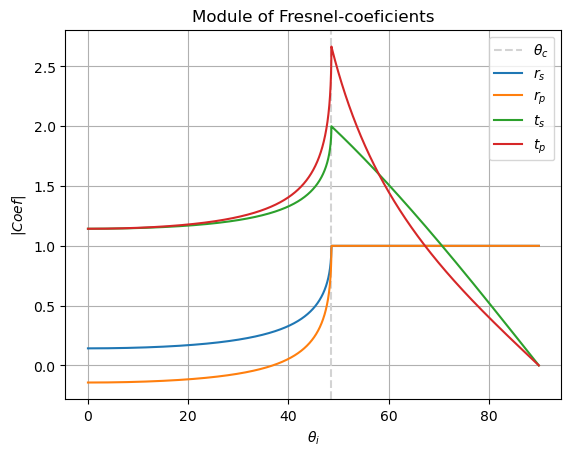

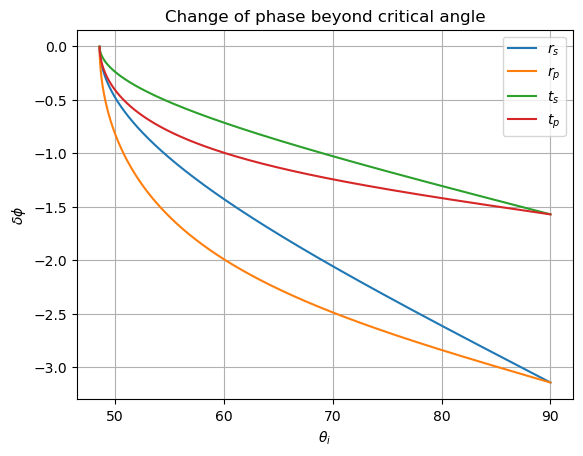

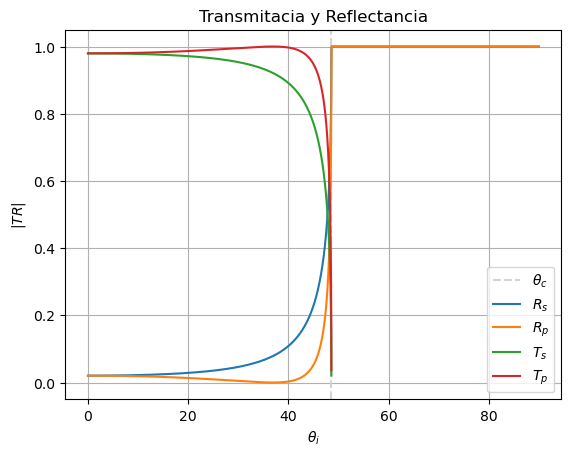

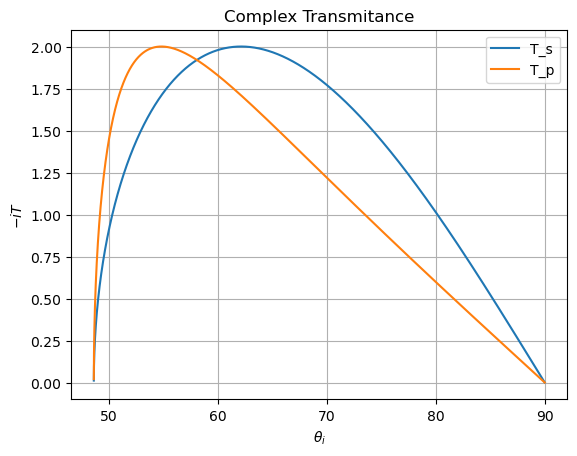

In [8]:
theta=np.linspace(0,90,100000)  #shouldn't matter the starting points
n_i=1.6
n_t=1.2
plots=[True,True,True,True]
plots_r=[True,True,False,False]
plots_t=[False,False,True,True]
#fresnel_coe(theta,(n_i,n_t))
plot_coef_complex(theta,(n_i,n_t),plots,[True,True])

plot_tran_complex(theta,(n_i,n_t),plots,[True,True])

#T_real are not well behave



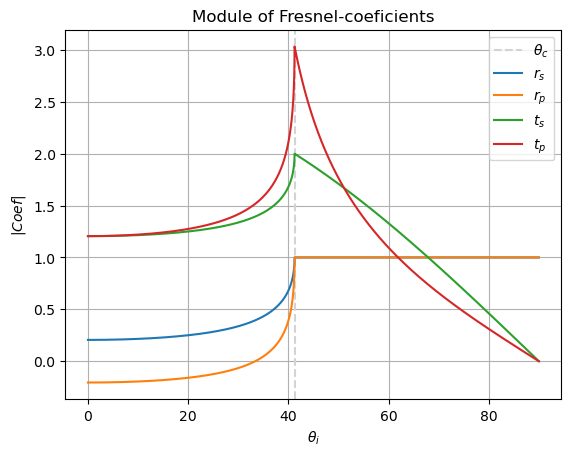

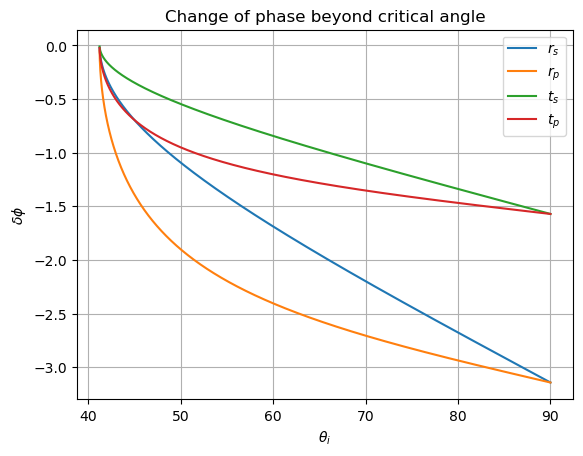

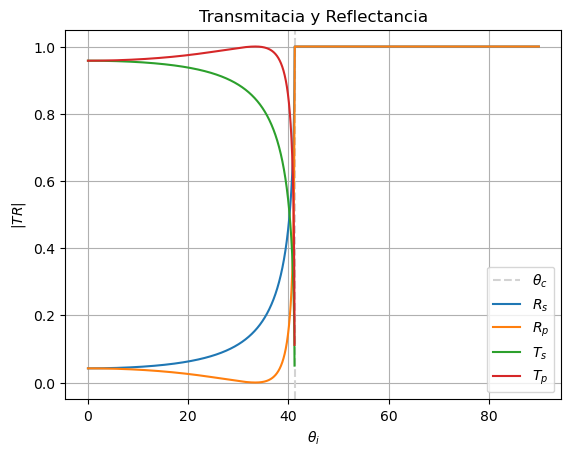

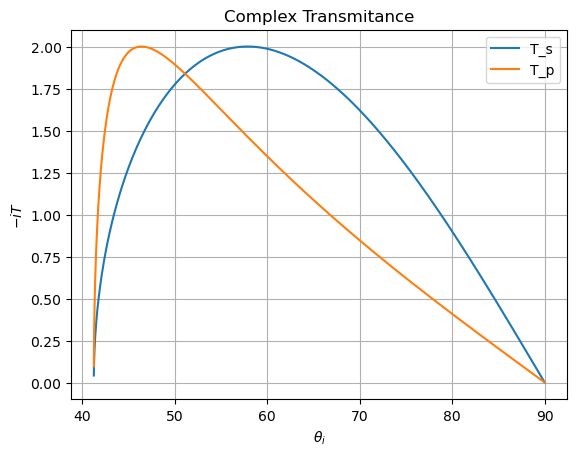

[[ 0.26504946]
 [-0.1441911 ]
 [ 1.26504946]
 [ 1.2982621 ]]
##########
[[0.07025122]
 [0.02079107]] [[0.92974878]
 [0.97920893]] []


In [9]:
#How to use them
n_i=1.517
n_t=1
nit=[n_i,n_t]
theta_input=np.array([22.5])
coef, theta_i, theta_i_complex, shift = fresnel_coe_complex(theta_input, nit, True)
R, T_real, T_complex, theta_i, theta_i_complex, shift=ene_coef_complex(theta_input, nit, True)

theta_d=np.linspace(0,90,10000) 
theta_r=np.linspace(0,np.pi/2,10000)
plots=[True,True,True,True]
plots_r=[True,True,False,False]
plots_t=[False,False,True,True]
plots_s=[True,False,True,False]
plots_d=[False,True,False,True]

plot_coef_complex(theta_d,nit,plots,[True,True]) #[Angle degree, Plot degree]
plot_tran_complex(theta_d,nit,plots,[True,True])
print(coef)
print('##########')
print(R,T_real,T_complex)


#Plotting


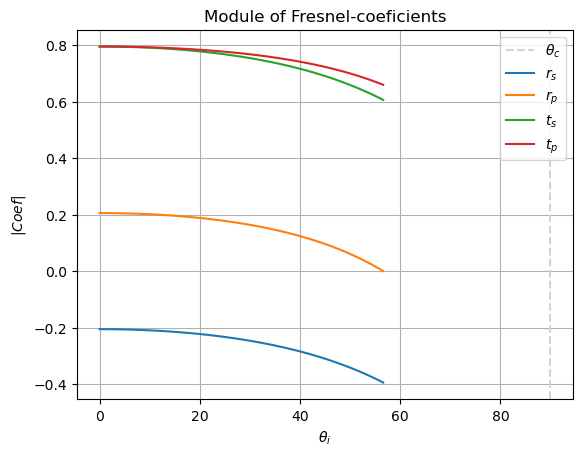

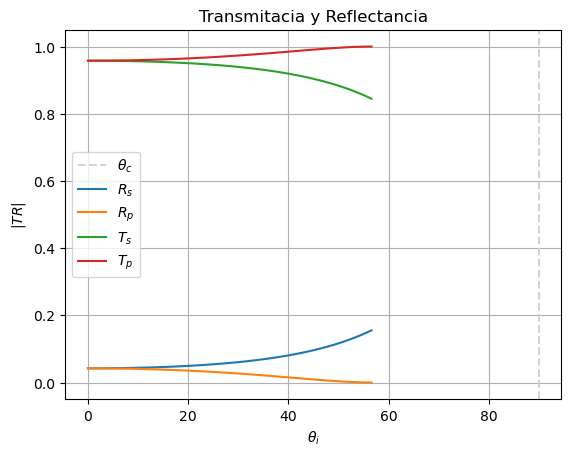

In [10]:
n_i=1
n_t=1.517
nit=[n_i,n_t]
b_angle=np.arctan(n_t/n_i)*180/np.pi
theta=np.linspace(0,b_angle)
plot_coef_complex(theta,nit,plots,[True,True]) 
plot_tran_complex(theta,nit,plots,[True,True])